#### PROJECT: WRANGLING AND ANALYZING DATA

### (WeRateDogs)

### STEP 1  DATA GATHERING
 ### STEPS
* Import all required python libraries
* Download twitter-archive-enhanced.csv file and read it into a pandas dataframe called twitter
* Use request library to download image-prediction.tsv progamatically and load it into a dataframe called image
* Read the tweet_Json.txt file line by line into a dataframe with tweet_id, retweet_count and favorite_count

### Importing all Required Python Library

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import tweepy
import re
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

### Read twitter-archive-enhanced.csv file into a pandas dataframe

In [3]:
#Reading the csv file into dataframe called twitter

twitter = pd.read_csv('twitter-archive-enhanced.csv')

### Use request library to programmatically download tweet image prediction

In [4]:
#Using request library to download image prediction file 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

    #Reading it into a tsv dataframe called image
    image = pd.read_csv('image-predictions.tsv', sep= '\t')

In [5]:
#reading the Json.txt file line by line into Pandas DataFrame with tweet_id, retweet_count and favorite_count
df = []
with open('tweet-json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called twitter_extra
twitter_extra = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])


### STEP 2 ACCESSING DATA
### The Data would be accessed both visually and programmatically

### Visual Accessment

In [6]:
#Visually access the twitter dataframe

twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#Visually acessing the image dataframe

image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#Visually access the twitter_extra dataframe

twitter_extra

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


### Programmatical Accessment
#### Programmatic accessment for the twitter dataframe

In [10]:
#Check the info of the twitter df
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#Checking for any null values
twitter[twitter['text'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
#Checking for any duplicated tweet id
twitter[twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
#Checking for duplicates expanded_urls

twitter[twitter.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [14]:
#Checking the dog name column

twitter['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
# programatically assessing the name column for rows with name as 'a', 'quite', 'None' etc 

twitter[twitter['name'] == 'a']
twitter[twitter['name'] == 'quite']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None


In [16]:
#checking the numerator and denominator column values

twitter['rating_numerator'].value_counts()
twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### Programmatic Accessment for the image df


In [18]:
#Checking the image df info

image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [19]:
#Checking the image number column

image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
#Checking jpg url column

image.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

### Programatic accessment of twitter_extra df

In [21]:
#Checking twitter_extra df info

twitter_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 64.4+ KB


In [22]:
#Checking for null values

twitter_extra.isnull()

,tweet_id,retweet_count,favorite_count,create_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2349,False,False,False,False
2350,False,False,False,False
2351,False,False,False,False
2352,False,False,False,False


In [23]:
#Checking for duplicate values

twitter_extra.duplicated().sum()

0

In [25]:
# Checking for duplicated columns by creating a list of every column in every dataset. 
# only tweet_id should be duplicated

all_columns = pd.Series(list(twitter) + list(image) + list(twitter_extra))

# all_columns

all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Quality Issues

1. The data type for the timestamp column is object when it should be a datetime.

2. In several columns null objects are represented as 'None' instead of NaN

3. Dog Name column have invalid names i.e 'None', 'quite', 'such', 'the 'a', 'an' etc

4. these columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) are floats instead of strings

5. Some rows have several identical values in the expanded_url column

6. Some tweet_ids have the same jpg_url in the image prediction data

7. Tweet_id fields in the three datasets are stored as numeric values and should be strings.

8. Create_date is object instead of datetime. 

### Tidiness Issues


9. We are only interested in “original tweets”, no “retweets”; the retweet data is in columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. 

10. Reply tweets are not “original tweets” either; this data is stored in the columns in_reply_to_status_id and in_reply_to_user_id

11. Dog stages (doggo, floofer, pupper, puppo) are spread in different columns.

12. Breed Predictions, Confidence intervals and Dog tests are spread in three columns. 


13. All dataframes will be merged into 1 using tweet_id as the primary key.



### STEP 3 CLEANING DATA
### In this segment, I'll be cleaning every issue I documented while accessing the various data frames and the issues listed in the data quality and tidiness segment.

In [26]:
#I'll make a copy of the datasets

twitter_clean = twitter.copy()
image_clean = image.copy()
twitter_extra_clean = twitter_extra.copy()

### Issue 1
The data type for the timestamp column is object when it should be a datetime.

### Define
Would use pandas library to convert the datatype in the timestamp column to datatime

### Code

In [27]:
twitter_clean['timestamp']= pd.to_datetime(twitter_clean['timestamp'])
twitter_clean['retweeted_status_timestamp']= pd.to_datetime(twitter_clean['retweeted_status_timestamp'])

### Test

In [28]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue 2
In several columns null objects are represented as 'None' instead of NaN

#### Define: Change values represented in twitter dataframe columns name, doggo, floofer, pupper, puppo as None to NaN

#### Code

In [29]:
twitter_clean['name'].replace('None', np.NAN, inplace =True)
twitter_clean['doggo'].replace('None', np.NAN, inplace =True)
twitter_clean['floofer'].replace('None', np.NAN, inplace =True)
twitter_clean['pupper'].replace('None', np.NAN, inplace =True)
twitter_clean['puppo'].replace('None', np.NAN, inplace =True)

### Test

In [30]:
twitter_clean['name'].value_counts()
twitter_clean['doggo'].value_counts()
twitter_clean['floofer'].value_counts()
twitter_clean['pupper'].value_counts()
twitter_clean['puppo'].value_counts()

puppo    30
Name: puppo, dtype: int64

### Issue 3: Dog Name column have invalid names i.e 'None', 'quite', 'such', 'the 'a', 'an' etc

#### Define: Write a for loop to asess the text column for the missing name of the dog and create a new name column to replace the old name column. Change names with words like 'a', 'an', 'such' to NAN values

### Code

In [32]:
# Looping through the texts to check for the dog name as earlier noticed during assessment. 
#using some sentences that were found to come before the name in the text and check if it matches any of the  conditions
# creating an empty list to append the result to
names = []

for text in twitter_clean['text']:
    # Start with 'This is ' and the first letter of the name is usually uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the first letter of the name is usually uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the first letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'His name is ' and the first letter of the name is uppercase
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the first letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # or Contains 'named' and the first letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        names.append('NaN')

# Test
len(names)

# Save result in a new column 'names'
twitter_clean['names'] = names


In [33]:
# using a for loop to iterate through the new name column for nan and using the existing name in the old name column to fill it
a = twitter_clean['name']
b = twitter_clean['names']
index = a.index
Names=b.values
x=len(b)
for i in range(0, x):
    if Names[i] == 'NaN':
        Names[i] = a[i]


In [34]:
#drop old column name 
twitter_clean = twitter_clean.drop('name', 1)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11584\1126095779.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_clean = twitter_clean.drop('name', 1)


In [35]:
#replacing dog names like 'such', 'a' and 'an' with NAN
twitter_clean['names'].replace('such', np.NAN, inplace =True)
twitter_clean['names'].replace('a', np.NAN, inplace =True)
twitter_clean['names'].replace('an', np.NAN, inplace =True)
twitter_clean['names'].replace('the', np.NAN, inplace =True)
twitter_clean['names'].replace('None', np.NAN, inplace =True)

In [36]:
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
1322,706291001778950144,NaN,NaN,2016-03-06 01:31:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/706291001...,11,10,NaN,NaN,NaN,NaN,NaN
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668623201...,10,10,NaN,NaN,NaN,NaN,Jomathan
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/793500921...,12,10,NaN,NaN,NaN,NaN,Fiona
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has no idea what happened h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/759447681...,11,10,NaN,NaN,NaN,NaN,Oakley
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886680336...,13,10,NaN,NaN,NaN,NaN,Derek


In [37]:
#checking the new name column value
twitter_clean['names'].value_counts()

Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
              ..
Zoe            1
Stewie         1
Lilah          1
Spanky         1
Christoper     1
Name: names, Length: 975, dtype: int64

In [38]:
#checking names with null value
sum(twitter_clean.names.isna())

789

### Issue 4: these columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) are floats instead of strings

### Define: Change datatype of these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string

### Code

In [39]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(object)
twitter_clean['in_reply_to_status_id'] = twitter_clean['in_reply_to_status_id'].astype(object)
twitter_clean['in_reply_to_user_id'] = twitter_clean['in_reply_to_user_id'].astype(object)
twitter_clean['retweeted_status_id'] = twitter_clean['retweeted_status_id'].astype(object)
twitter_clean['retweeted_status_user_id'] = twitter_clean['retweeted_status_user_id'].astype(object)

### Test

In [40]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue 5: Some rows have several identical values in the expanded_url column

### Define
Remove the duplicated rows

### Code

In [41]:
twitter_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

### Test

In [42]:
sum(twitter_clean.expanded_urls.duplicated())

0

### Issue 6 Some tweet_ids have the same jpg_url in the image prediction data

### Define
Drop the duplicated urls

### Code

In [43]:
image_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

### Test

In [44]:
sum(image_clean.jpg_url.duplicated())

0

### Issue 7 Tweet_id fields in the three datasets are stored as numeric values and should be strings.

### Define
Convert the datatype from int to string

### Code


In [48]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(object)
twitter_extra_clean['tweet_id'] = twitter_extra_clean['tweet_id'].astype(object)

### Test

In [49]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


### Issue 8
Create_date is object instead of datetime

 ### Define
 Change create_date column in twitter_extra df to datetime

 ### Code

In [50]:
twitter_extra['create_date'] = pd.to_datetime(twitter_extra['create_date'])

### Test

In [51]:
twitter_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   int64              
 1   retweet_count   2354 non-null   int64              
 2   favorite_count  2354 non-null   int64              
 3   create_date     2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.6 KB


### Tidiness Issues

### Issue 9

We are only interested in “original tweets”, no “retweets”; the retweet data is in columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Define: drop rows with retweets and columns retweeted_status_id, retweeted_status_user and retweeted_status_timestamp 

### Code

In [52]:
#keeping rows without retweets
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]

In [53]:
#dropping the columns containing retweets 
twitter_clean.drop(twitter_clean.iloc[:, 6:9], inplace= True, axis=1)

### Test

In [54]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2039 non-null   object             
 1   in_reply_to_status_id  24 non-null     object             
 2   in_reply_to_user_id    24 non-null     object             
 3   timestamp              2039 non-null   datetime64[ns, UTC]
 4   source                 2039 non-null   object             
 5   text                   2039 non-null   object             
 6   expanded_urls          2038 non-null   object             
 7   rating_numerator       2039 non-null   int64              
 8   rating_denominator     2039 non-null   int64              
 9   doggo                  80 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 221 non-null    object           

### Issue 10 Reply tweets are not “original tweets” either; this data is stored in the columns in_reply_to_status_id and in_reply_to_user_id.

### Define
drop reply tweet column

### Code

In [55]:
#keeping rows without replies
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.in_reply_to_user_id.isnull()]

In [56]:
#dropping the columns containing replies to tweet
twitter_clean.drop(twitter_clean.iloc[:, 1:3], inplace= True, axis=1)

### Test

In [57]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   object             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   doggo               79 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              218 non-null    object             
 10  puppo               21 non-null     object             
 11  names               1389 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue 11 Dog stages (doggo, floofer, pupper, puppo) are spread in different columns.

#### Define: Melt the four dog columns(doggo, floofer, pupper and puppo) into a column called dog_stages and change datatype to category
### Code

In [58]:
print(twitter_clean.doggo.value_counts())
print(twitter_clean.floofer.value_counts())
print(twitter_clean.pupper.value_counts())
print(twitter_clean.puppo.value_counts())

doggo    79
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    218
Name: pupper, dtype: int64
puppo    21
Name: puppo, dtype: int64


In [59]:
#Extract dog stage from text column into the new dog_stage column

twitter_clean['dog_stage'] = twitter_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_clean.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...
rating_numerator,13,13,12,13,12
rating_denominator,10,10,10,10,10
doggo,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN


In [60]:
#Drop unrequired columns

twitter_clean = twitter_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

### Test

In [61]:
twitter_clean.dog_stage.value_counts()

pupper     228
doggo       75
puppo       26
floofer      4
Name: dog_stage, dtype: int64

### Issue 12 Breed Predictions, Confidence intervals and Dog tests are spread in three columns. 

#### Define: 
Create two new columns in image predictions dataframe called dog_breed and confidence by checking each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copying the breed with the highest confidence level into the new breed column. </br>
Also, copy the associated confidence level into the new confidence column. </br> For cases where all 3 predictions are False (NOT a valid dog breed), dog_breed will be set as NAN and confidence to 0 and previous multiple columns will be dropped

### Code

In [62]:
# the conditions for selection when it is a dog
conditions = [(image_clean['p1_dog'] == True),
              (image_clean['p2_dog'] == True),
              (image_clean['p3_dog'] == True)]

# the choice order based on the selection conditions for predicted breed
breeds = [image_clean['p1'], 
        image_clean['p2'],
        image_clean['p3']]

# the choice order for confidence level based on the selection conditions
confidence_level = [image_clean['p1_conf'], 
                    image_clean['p2_conf'], 
                    image_clean['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog breed column
image_clean['dog_breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# selecting the predicted confidence level based on the first successful condition and placing into new confidence column
image_clean['confidence'] = np.select(conditions, confidence_level, 
                                            default = 0)

#droping previous prediction and confidence level columns


image_clean.drop(image_clean.iloc[:,3:12], inplace= True, axis=1)

In [63]:
#replace none as nan then drop them since they are not dogs
image_clean['dog_breed'].replace('none', np.NAN, inplace =True)


In [64]:
image_clean.dropna(axis= 0, subset='dog_breed', inplace= True)

### Test

In [65]:
#checking to see the columns
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   object 
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   dog_breed   1691 non-null   object 
 4   confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 59.4+ KB


### Here I'll confirm the columns of the dataframes before merging them into one.

In [66]:
twitter_extra_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 55.2+ KB


In [67]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   object             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   names               1389 non-null   object             
 8   dog_stage           333 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 110.2+ KB


### Issue 13 All dataframes will be merged into 1 using tweet_id as the primary key

### Define Merge the 3 dataframes into one using tweet_id

### Code

In [68]:
#I'll merge all the dataframes into a new one called twitter_master

twitter_master =pd.merge(pd.merge(twitter_clean, 
                                         image_clean, how= 'inner', on ='tweet_id'), 
                                twitter_extra_clean, how='inner', on= 'tweet_id')

### Test

In [69]:
twitter_master.head().T

,0,1,2,3,4
tweet_id,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856
timestamp,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00,2017-07-29 00:08:17+00:00
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...
expanded_urls,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891087950...
rating_numerator,13,12,13,12,13
rating_denominator,10,10,10,10,10
names,Tilly,Archie,Darla,Franklin,NaN
dog_stage,NaN,NaN,NaN,NaN,NaN
jpg_url,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg


In [70]:
#drop columns that are not needed

twitter_master.drop(['create_date', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis =1, inplace= True)


In [71]:
#Now check the columns I have left
twitter_master.head().T

,0,1,2,3,4
tweet_id,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856
timestamp,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00,2017-07-29 00:08:17+00:00
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...
names,Tilly,Archie,Darla,Franklin,NaN
dog_stage,NaN,NaN,NaN,NaN,NaN
jpg_url,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
img_num,1,1,1,2,1
dog_breed,Chihuahua,Chihuahua,Labrador_retriever,basset,Chesapeake_Bay_retriever
confidence,0.323581,0.716012,0.168086,0.555712,0.425595


### STEP 4

### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
twitter_master.to_csv("twitter_archive_master.csv", index= False)

### STEP 5

### ANALYZING AND VISUALIZING DATA

### Insights
1. What is the most common dog_stage?
2. What is the most common dog_breed?
3. What is the most common tweet source?
4. What dog_stage has the highest average retweet_counts?
5. What is the most common dog names?

What are the most common dog_stage?

In [73]:
#What is the most common dog stage

twitter_master.dog_stage.value_counts()

pupper     170
doggo       57
puppo       25
floofer      3
Name: dog_stage, dtype: int64

Pupper is the most common dog stage followed by doggo and puppo

In [74]:
#What is the most common dog breed

twitter_master.dog_breed.value_counts()

golden_retriever      148
Labrador_retriever    101
Pembroke               91
Chihuahua              88
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_breed, Length: 113, dtype: int64

Golden retriever is the most common dog breed, followed by labrador retriever and pembroke

In [76]:
#What is the most common tweet source

twitter_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1568
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

Twitter for iphone is the most comon tweet source

In [77]:
#What dog stage has the highest average retweet count

twitter_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).astype(int)

dog_stage
floofer    8529
puppo      7134
doggo      5466
pupper     2059
Name: retweet_count, dtype: int32

Floofer has the highest average retweet count

In [78]:
#What is the most common dog names

twitter_master.names.value_counts().nlargest(5)

Lucy       10
Charlie     9
Cooper      9
Tucker      9
Penny       8
Name: names, dtype: int64

Lucy is the most common dog name

### Visualizing

Visualization showing insights on dog breed

''

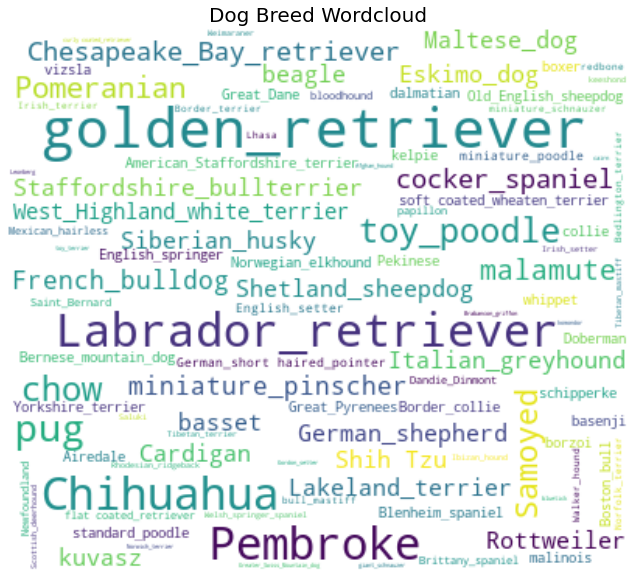

In [79]:
# Wordcloud for dog_breed visualization:
text = twitter_master.loc[:, 'dog_breed'].str.cat(others=None, sep=' ')

# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=200,  stopwords=STOPWORDS,
              width=400, height=350,contour_width=0.1, 
                      contour_color='green')

# Generate word cloud
wc.generate(text)
# Show word cloud
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=20)
plt.axis('off')
;

### Visualization showing dog stage by favorite count

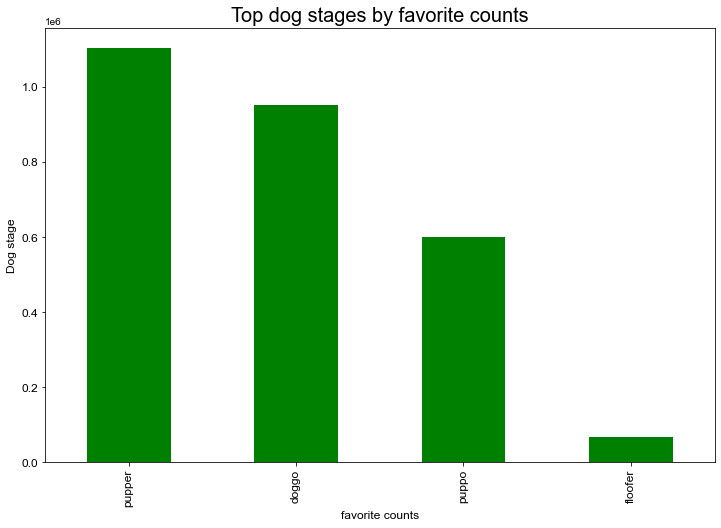

In [80]:
#plotting a bar chart to show top 5 dog breed by favorite counts

top_stage = twitter_master.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.title("Top dog stages by favorite counts", size=20)
top_stage.plot(kind='bar',fontsize=12,color='g')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

### Visualization showing correlation between retweet_count and favorite_count

Text(0, 0.5, 'Favorite Count')

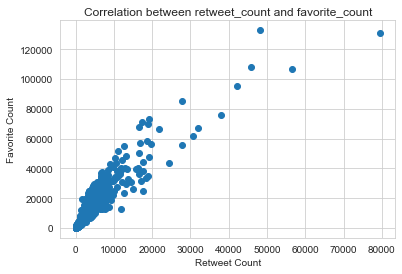

In [82]:
plt.scatter(twitter_master.retweet_count, twitter_master.favorite_count)
plt.title('Correlation between retweet_count and favorite_count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

There is a linear correlation between retweet count and favorite count